# KLASIFIKASI BUNGA IRIS

Pada tugas besar ini akan dilakukan klasifikasi jenis bunga Iris menjadi 2 spesies, "Iris-setosa" dan "Iris-versicolor"

# BAGIAN 1 - DATA PREPARATION

In [1]:
import pandas as pd

Dilakukan import library pandas, library pandas sendiri digunakan untuk melakukan proses load data dari file .csv. Pada aplikasi ini pandas diimpor dengan alias "pd" untuk memudahkan akses nama library yang lebih singkat

In [2]:
data = pd.read_csv('Iris.csv')

Dilakukan proses load data dari file .csv dengan memanggil method read_csv() dari library pandas untuk me-load data .csv yang berisi data bunga Iris dan disimpan ke dalam variabel "data"

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000,2.862000,0.785000
std,29.011492,0.641698,0.476057,1.448565,0.566288
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.750000,5.000000,2.800000,1.500000,0.200000
50%,50.500000,5.400000,3.050000,2.450000,0.800000
75%,75.250000,5.900000,3.400000,4.325000,1.300000
max,100.000000,7.000000,4.400000,5.100000,1.800000


Pada tabel di atas ditampilkan data yang sudah di-load dari file .csv yang disimpan dalam variabel bernama data, dimana variabel ini bertipe pandas dataframe
Terdpat 150 baris data Bunga Iris yang terdiri dari 6 kolom
Dari 6 kolom yang tersedia, 5 kolom berisi angka numerik, dan 4 di antaranya bernilai kontinu dan  1 kolom lainnya adalah kolom id yang hanya menunjukkan index atau id dari data.
Selain itu terdapat 1 buah kolom yang bernama Species, dimana data ini bersifat kategorial yang menunjukkan kategori atau jenis bunga Iris

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Pada blok kode di atas dilakukan pengecekan jumlah data yang bernilai null atua kosong pada data yang sudah di-load. Ternyata untuk semua kolom, jumlah data yang null atau kosong adalah 0 yang menunjukkan bahwa data lengkap, sehingga tidak perlu dilakukan proses untuk eliminasi atau melakukan proses replace seperti menggunakan interpolasi untuk data yang kosong.

In [6]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.572341,-0.619103,0.826348,0.821018
SepalLengthCm,0.572341,1.000000,-0.197646,0.812389,0.789613
SepalWidthCm,-0.619103,-0.197646,1.000000,-0.595761,-0.560120
PetalLengthCm,0.826348,0.812389,-0.595761,1.000000,0.978856
PetalWidthCm,0.821018,0.789613,-0.560120,0.978856,1.000000


Pada blok kode di atas ditampilkan korelasi antar dua variabel/kolom. Rentang nilai korelasi berada pada rentang -1 sampai 1

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

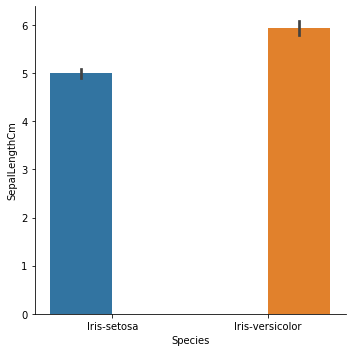

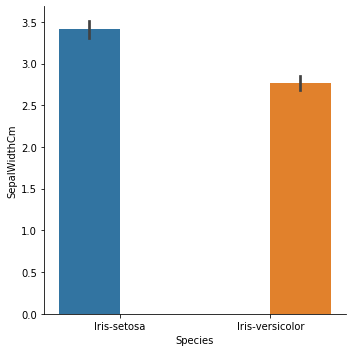

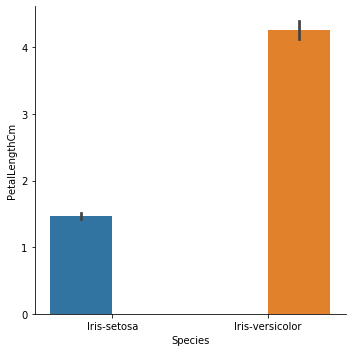

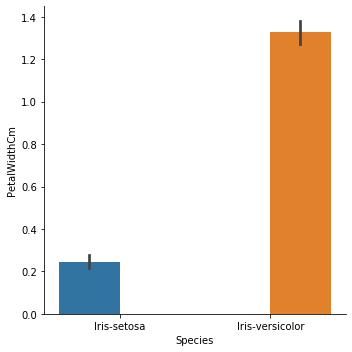

In [8]:
sns.catplot(x="Species", y="SepalLengthCm", hue="Species", kind="bar", data=data);
sns.catplot(x="Species", y="SepalWidthCm", hue="Species", kind="bar", data=data);
sns.catplot(x="Species", y="PetalLengthCm", hue="Species", kind="bar", data=data);
sns.catplot(x="Species", y="PetalWidthCm", hue="Species", kind="bar", data=data);

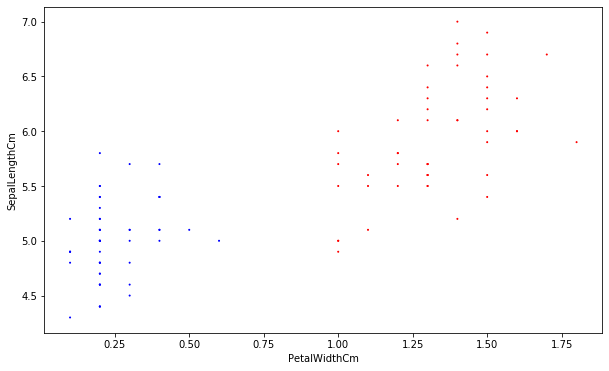

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(data['PetalWidthCm'], data['SepalLengthCm'], data['Species']=="Iris-versicolor", color='red')
plt.scatter(data['PetalWidthCm'], data['SepalLengthCm'], data['Species']=="Iris-setosa", color='blue')
plt.xlabel('PetalWidthCm')
plt.ylabel('SepalLengthCm')
plt.show()

Pada kode di atas ditampilkan visualisasi korelasi antar data PetalWidth dan SepalLength, dimana pada scatterplot di atas ditampilkan sesuai warna masing-masing kategori atau kelas, terlihat bahwa antar kelas memilki daerah yang terbagi jelas.

# BAGIAN 2 - TRAINING

Sebelum proses fitting atau train data dilakukan, perlu adanya normalisasi yang dilakukan untuk data yang ada dan pembagian data menjadi data train & testing

In [10]:
data['Species']=data['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1})

Kode di atas digunakan untuk melakukan mapping dari kategori yang bertipe string menjadi index dalam bentuk angka

In [11]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [12]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, -1].values

Blok kode di atas digunakan untuk membagi data menjadi data input dan output, dimana X akan mengambil seluruh nilai pada kolom index 1 sampai kurang dari 5, dan y akan terisi oleh nilai di kolom terakhir yang merupakan kolom kelas atau target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

Blok kode di atas digunakan untuk membagi data menjadi data train dan data testing, dimana pembagian untuk data training dan data testing adalah 80%:20% dengan random state sebesar 45 untuk mengacak data karena data awal masih terurut berdasarkan kategori atau kelasnya masing-masing

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Pada kode di atas, dilakukan suatu proses scaling untuk nilai input atau nilai X yang sudah terbagi menjadi X_train dan X_test, dimana scaling sendiri dilakukan untuk normalisasi atau scaling input secara default object scaler sendiri akan melakukan scaling atau normalisasi dengan variance based

In [16]:
import numpy as np
import math as mat

Dilakukan impor library numpy dan math untuk melakukan operasi perhitungan pada ANN dan untuk mempermudah dalam proses pengolahan data

In [17]:
w_in=np.array([
    [0.15, 0.25, 0.25],
    [0.1, 0.25, 0.15],
    [0.25, 0.15, 0.1],
    [0.5, 0.1, 0.3]
])
w_hid=np.array([0.3, 0.2, 0.1])
bias_hid=np.array([1, 1, 1])
bias_out=np.array([1])
input_hidden=np.zeros(3)

learning_rate=0.1

Pada kode di atas, dilakukan inisialisasi beberapa parameter seperti bobot, bias, dan learning rate

In [18]:
def sigma_count(x_in, w_in, b_in):
    sigma_sum=0
    for i in range(len(x_in)):
        sigma_sum+=x_in[i]*w_in[i]
    sigma_sum+=b_in
    return sigma_sum

Blok kode di atas digunakan untuk melakuakn proses perhitungan nilai dot product dari input dikalikan dengan bobot kemudian ditambahkan dengan bias

In [19]:
def sigmoid_count(x_input):
    x_input=x_input*(-1)
    sigmoid_value=1/(1+mat.exp(x_input))
    return sigmoid_value

Blok kode di atas merupakan fungsi perhitungan nilai aktivasi dengan menggunakan fungsi sigmoid

In [20]:
def forward_count(x_in, w_in_layer, w_hid_layer, b_hid_layer, b_out_layer):
    for x in range(len(input_hidden)):
        w_in_col=w_in_layer[:, x]
        input_hidden[x]=sigma_count(x_in, w_in_col, b_hid_layer[x])
    for x in range(len(input_hidden)):
        input_hidden[x]=sigmoid_count(input_hidden[x])
    
    outlayer_in=sigma_count(input_hidden, w_hid_layer, b_hid_layer[0])
    forward_output=sigmoid_count(outlayer_in)
    return forward_output

Blok kode di atas digunakan dalam proses perhitungan nilai forward pass pada backpropagation

In [21]:
def backprop(err, x_in, forward_output):
    global w_in
    global w_hid
    global bias_hid
    global bias_out
    d_out=forward_output*(1-forward_output*err)
    d_in_hidden=np.zeros(len(input_hidden))
    for x in range(len(input_hidden)):
        d_in_hidden[x]=learning_rate*d_out*input_hidden[x]
    d_bias_in_hidden=learning_rate*d_out
    d_hidden_layer=np.zeros(len(w_hid)) #len(w_hid)
    for x in range(len(d_hidden_layer)):
        d_hidden_layer[x]=input_hidden[x]*(1-input_hidden[x])*d_out*w_hid[x]
    d_in=np.zeros(w_in.shape)
#     print(len(d_in))
    for x in range(len(d_in)):
        for y in range(len(d_in[0])):
            d_in[x][y]=learning_rate*d_hidden_layer[y]*x_in[x]
    d_bias_in=learning_rate*d_hidden_layer
#     adjust_weight(d_in, d_in_hidden, d_bias_in_hidden, d_bias_in)
    w_in=w_in+d_in
    w_hid=w_hid+d_in_hidden
    bias_hid=bias_hid+d_bias_in_hidden
    bias_out=bias_out+d_bias_in

Blok kode di atas merupakan fungsi perhitungan  backward pass pada backpropagation, dimana pada fungsi ini dilakukan proses backward chain dari output yang dihasilkan pada forward pass yang kemudian di sini nantinya juga akan dilakukan proses penyesuaian bobot dan bias

In [22]:
def train_data(epoch):
    for a in range(epoch):
        for i in range(len(X_train)):
            input_x=X_train[i, :]
            output_y=y_train[i]
            forward_output=forward_count(input_x, w_in, w_hid, bias_hid, bias_out)
            err=0.5*(output_y-forward_output)**2
            backprop(err, input_x, forward_output)

Fungsi di atas adalah fungsi yang digunakan untuk melakukan training atau fitting data dengan parameter jumlah epoch yang menentukan jumlah iterasi

In [23]:
train_data(200)

Kode di atas digunakan untuk men-train atau melakukan fitting data dengan epoch sejumlah 200, dimana nantinya akan dihasilkan weight yang sudah disesuaikan dan dapat dilakukan klasifikasi dengan menggunakan fungsi forward pass dengan weight atau bobot dan bias yang sudah disesuaikan

# BAGIAN 3 - EVALUATING RESULT

In [24]:
result=np.zeros(len(X_train))
for x in range(len(result)):
    result[x]=forward_count(X_train[x], w_in, w_hid, bias_hid, bias_out)

Kode di atas digunakan untuk mendapatkan hasil dari proses forward pass berdasarkan weight yang sudah diadjust di fungsi train, dimana dilakukan proses forward pass pada data training terlebih dahulu

In [25]:
print(result)
print(y_train)
result_=result-y_train
sum_acc=0
for x in (result_):
    if x==0:
        sum_acc+=1
acc=sum_acc/len(result_)
print("The accuracy is: ")
print(acc)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1
 1 1 0 0 0 1]
The accuracy is: 
0.5


Kode di atas digunakan untuk menghitung akurasi dari training set, ternyata hasil yang didapatkan adalah 0.5

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(result, y_train)

0.5

Kode di atas digunakan untuk menghitung akurasi dari train set dengan library, ternyata hasil yang didapatkan adalah 0.5 sama seperti dengan perhitungan secara manual

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, result)

Kode di atas digunakan untuk mengimpor confusion matrix dari library sklearn.metrics dan dibuatkan objek confussion matrix berdasarkan hasil output training dan hasil sesungguhnya pada training set

In [29]:
print(cm)

[[ 0 40]
 [ 0 40]]


Pada kode di atas ditampilkan nilai dari confussion matrix, ternyata nilai true positive bernilai nol dan false positive bernilai 40. False negative bernilai 0, dan true negative bernilai 40. Positive ini menunjukkan klasifikasi terhadap kategori 1 atau Iris-versicolor, sedangkan negative menunjukkan klasifikasi terhadap kategori 0 atau Iris-setosa.
Sesuai dengan akurasi yaitu 0.5

In [30]:
result=np.zeros(len(X_test))
for x in range(len(result)):
    result[x]=forward_count(X_test[x], w_in, w_hid, bias_hid, bias_out)

Kode di atas digunakan untuk mendapatkan hasil dari proses forward pass berdasarkan weight yang sudah diadjust di fungsi train, dimana dilakukan proses forward pass pada data test

In [31]:
print(result)
print(y_test)
result_=result-y_test
sum_acc=0
for x in (result_):
    if x==0:
        sum_acc+=1
acc=sum_acc/len(result_)
print("The accuracy is: ")
print(acc)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1]
The accuracy is: 
0.5


Kode di atas digunakan untuk menghitung akurasi dari test set secara manual, ternyata hasil yang didapatkan adalah 0.5

In [32]:
accuracy_score(result, y_test)

0.5

Kode di atas digunakan untuk menghitung akurasi dari test set dengan library, ternyata hasil yang didapatkan adalah 0.5 sama seperti dengan perhitungan secara manual

In [33]:
cm = confusion_matrix(y_test, result)

In [34]:
print(cm)

[[ 0 10]
 [ 0 10]]


Pada kode di atas ditampilkan nilai dari confussion matrix, ternyata nilai true positive bernilai nol dan false positive bernilai 10. False negative bernilai 0, dan true negative bernilai 10. Positive ini menunjukkan klasifikasi terhadap kategori 1 atau Iris-versicolor, sedangkan negative menunjukkan klasifikasi terhadap kategori 0 atau Iris-setosa.
Sesuai dengan akurasi yaitu 0.5